# SEM MRes 2021
## 01-ASE-GPAW-BandStructure

In [1]:
import matplotlib.pyplot as plt
# change defaults to make plots bigger
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 dpi is really fine, but slower (i.e. for publication)

In [2]:
import ase # The Atomic Simulation Environment

In [3]:
from ase.spacegroup import crystal

# https://materialsproject.org/materials/mp-2998/
#atoms = crystal("BaTiO3", basis=[(0,0,0),(0.5,0.5,0.5),(0.5,0.5,0)],
#                spacegroup=221, size=1, 
#                cellpar=[4.036,4.036,4.036, 90,90,90])

atoms = crystal("CsPbI3", basis=[(0,0,0),(0.5,0.5,0.5),(0.5,0.5,0)],
                spacegroup=221, size=1, 
                cellpar=[6.3,6.3,6.3, 90,90,90])

# Here 'size' gives you the supercell expanion, so size=1 is just a unit cell, 
# size=2 is a 2x2x2 supercell and so on. Making a larger supercell can help with 
# the visualisation below, but try not to run a calculation on this, as the effort scales as N^3 !

In [4]:
#from ase.visualize import view
#view(atoms,viewer='ngl') # This is a swish GL powered visualisation; 
# but it doesn't work on my combination of Linux backend and Linux webbrowser

In [15]:
from ase.visualize import view
view(atoms,viewer='x3d')
# This is interactive! Try wiggling the atoms.

In [6]:
print(atoms)

Atoms(symbols='CsPbI3', pbc=True, cell=[6.3, 6.3, 6.3], spacegroup_kinds=...)


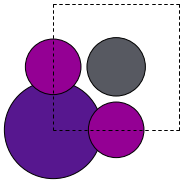

In [7]:
# Alternatively, rather than have an interactive 3D visualisation, 
# let's use the ase.write function to output a PNG (picture)
from ase.io import write
write('image.png', atoms)

# And then use a bit of iPython magic to pull this image back into the browser
from IPython.display import Image
Image("image.png")

# Hawk! A unit cell.

In [8]:
# Let's boot up GPAW: https://wiki.fysik.dtu.dk/gpaw/
from gpaw import GPAW, PW

# Reciprocal space / Brillouin Zone / k-space sampling information:
#  https://wiki.fysik.dtu.dk/gpaw/documentation/manual.html#brillouin-zone-sampling

# Rather than an ab-initio DFT method, 
# we are going to use a LCAO (linear combination of atomic orbitals) approximation.
# This keeps the calculation requirements modest, for you to be able to do this in a lab.
# Feel free to revist here and 'turn the dials up' to get a publication-quality result.
calc=GPAW(mode='lcao', kpts=[6,6,6])

# The below uses PW (Plane Wave) mode with a Kinetic Energy cut-off (basis set size)
# xc = exchange correlation functional, in this case PBE (a good starting point for semiconductors)
#calc=GPAW(mode=PW(200),
#            kpts=[4,4,4],
#            xc='PBE',
#            convergence={'bands': 5})



  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  21.6.0
 |___|_|             

User:   jupyter@orac
Date:   Tue Nov  2 15:01:55 2021
Arch:   x86_64
Pid:    28140
Python: 3.9.7
gpaw:   /home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/gpaw
_gpaw:  /home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/
        _gpaw.cpython-39-x86_64-linux-gnu.so
ase:    /home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/ase (version 3.21.1)
numpy:  /home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/numpy (version 1.21.3)
scipy:  /home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/scipy (version 1.7.1)
libxc:  4.3.4
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  kpts: [6 6 6]
  mode: lcao



In [9]:
# OK - let's run this calculation! This will take some computation
atoms.calc = calc
atoms.get_potential_energy()
calc.write('atoms.gpw') 
# save our electronic structure, converged with a k-point mesh, for later


System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Cs-setup:
  name: Caesium
  id: aed08365ef3295857e318b03a15ea546
  Z: 55.0
  valence: 9
  core: 46
  charge: 0.0
  file: /home/jupyter/miniconda3/envs/PEM2021/share/gpaw/Cs.LDA.gz
  compensation charges: gauss, rc=0.33, lmax=2
  cutoffs: 2.06(filt), 2.51(core),
  valence states:
                energy  radius
    5s(2.00)   -26.872   1.164
    6s(1.00)    -2.224   1.164
    5p(6.00)   -13.611   1.058
    *p          13.601   1.058
    *d           0.000   1.058

  Using partial waves for Cs as LCAO basis

Pb-setup:
  name: Lead
  id: 7a18fbdaa6fa62dad9c5f7b3306a2a40
  Z: 82.0
  valence: 14
  core: 68
  charge: 0.0
  file: /home/jupyter/miniconda3/envs/PEM2021/share/gpaw/Pb.LDA.gz
  compensation charges: gauss, rc=0.38, lmax=2
  cutoffs: 2.36(filt), 2.43(core),
  valence states:
                energy  radius
    6s(2.00)   -12.249   1.259
    6p(2.00)    -3.713   1.275
    5d(10.00)   -21.

Writing to atoms.gpw (mode='')



In [10]:
# OK, sanity checks on that calculation!
# What is the band-gap, and does it look sensible?
from ase.dft.bandgap import bandgap
gap, p1, p2 = bandgap(atoms.calc)
# Output is the gap in eV
# and from where the VBM in k-space is, and where the CBM is.
# From here you can appreciate whether the material is direct or not.

Gap: 2.118 eV
Transition (v -> c):
  (s=0, k=9, n=21, [0.42, 0.42, 0.42]) -> (s=0, k=9, n=22, [0.42, 0.42, 0.42])


CUB(a=6.3)
  Variant name: CUB
  Special point names: GXRM
  Default path: GXMGRX,MR

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    X   0.0000  0.5000  0.0000
    R   0.5000  0.5000  0.5000
    M   0.5000  0.5000  0.0000



/home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/ase/dft/bz.py:60: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/home/jupyter/miniconda3/envs/PEM2021/lib/python3.9/site-packages/ase/dft/bz.py:51: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  zs3d, renderer.M)


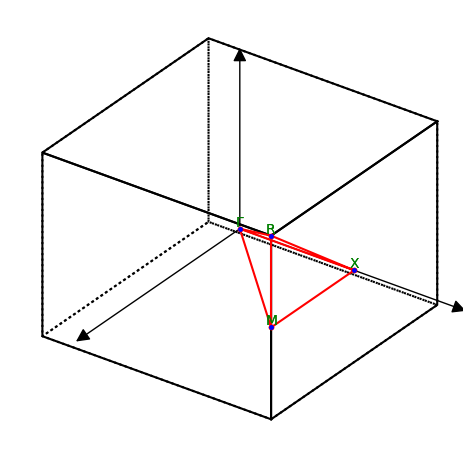

<Axes3DSubplot:>

In [11]:
# OK! Luckily ASE knows all about space groups and the reciprocal lattice.
# So let's ask it what it knows about this one, and a suggested high-symmetry path.
lat = atoms.cell.get_bravais_lattice()
print(lat.description())
lat.plot_bz(show=True)

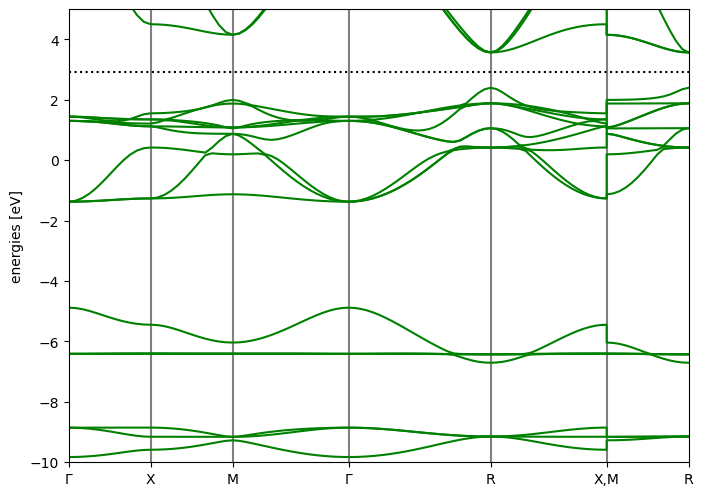

In [12]:
# Restart from ground state, with a fixed potential:

# Note we use the obsolete 'fixdensity' keyword as it seems more reliable!

bs_calc = GPAW('atoms.gpw',
               fixdensity=True,
               symmetry='off')
bs_calc.set(kpts={'path': 'GXMGRX,MR', 'npoints': 100}) 
 # path through k-space taken from Materials project; or from analysis above

bs_calc.get_potential_energy() # eval at these k-point path
bs=bs_calc.band_structure() # generate the plot object
bs.plot()

plt.show()

In [13]:
# Wait a second, why is the band gap different?
from ase.dft.bandgap import bandgap
gap, p1, p2 = bandgap(bs_calc)

Gap: 1.171 eV
Transition (v -> c):
  (s=0, k=65, n=21, [0.50, 0.50, 0.50]) -> (s=0, k=65, n=22, [0.50, 0.50, 0.50])


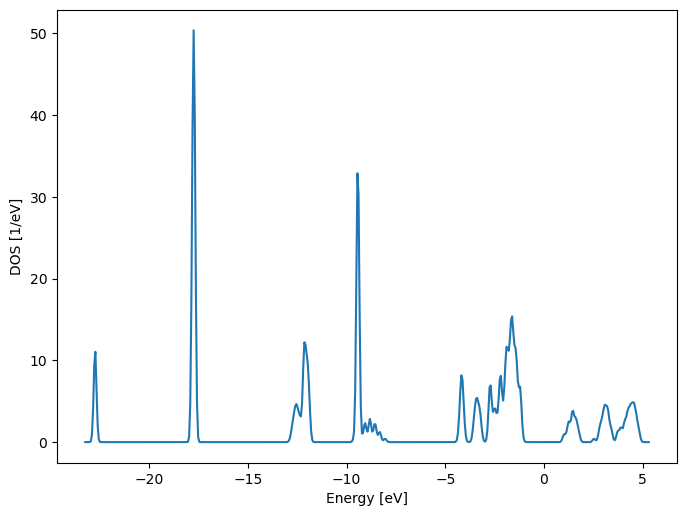

In [14]:
# Let's calculate the Density of States (DoS) of this band structure, and then plot it
from ase.dft.dos import DOS

dos = DOS(calc, npts=500, width=0.1)
energies = dos.get_energies()
weights = dos.get_dos()

ax = plt.gca()
ax.plot(energies, weights)
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('DOS [1/eV]')
plt.show()